In [1]:
%reload_ext autoreload
%autoreload 2
import tie.dbutils as db
import tie.utils as qa
import pandas as pd
from scipy.io import savemat, loadmat
import json
from tqdm import tqdm
import os
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import DivergingNorm, TwoSlopeNorm, Normalize
from statsmodels.stats.multitest import fdrcorrection
import matplotlib.patches as patches
from matplotlib import cm

In [2]:
rc('font', **{'family':'sans-serif',
              'sans-serif':['Helvetica']})
FONT_SIZE = 25
params = {'axes.labelsize': FONT_SIZE,
          'axes.titlesize': FONT_SIZE, 
          'legend.fontsize': FONT_SIZE, 
          'xtick.labelsize': FONT_SIZE, 
          'ytick.labelsize': FONT_SIZE}
matplotlib.rcParams.update(params)
ORDER = [0, 2, 3, 1]
version = 'v5_IRLS'

In [3]:
all_age = loadmat(f'../../all_age_gender_log_{version}.mat')['all_age_gender'][0]
len(all_age)
all_jid_aut = loadmat(f'../../all_jid_aut_{version}.mat')['all_jid_aut'][0]
len(all_jid_aut)

4

# S1
example scatter plot pixel to pixel

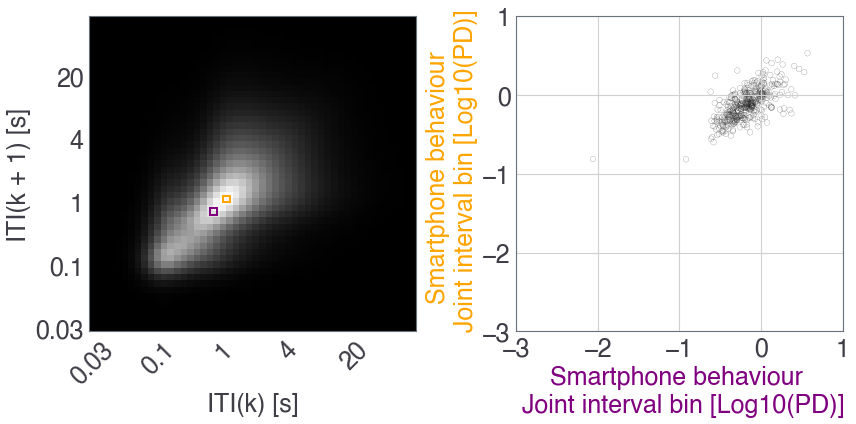

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

labels = ['0.03', '0.1', '1', '4', '20']
ticks = np.arange(50)[::10]

IDX = 0

self_res = all_jid_aut[0].flat[0][0].flat[0]
A = all_jid_aut[0].flat[0][1].squeeze()

im = ax[0].imshow(10 ** np.mean(A, 0).reshape(50, 50), aspect='auto', cmap='gray')

ax[0].invert_yaxis()
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)
ax[0].xaxis.set_tick_params(rotation=45)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].set_xlabel('ITI(k) [s]')
ax[0].set_ylabel('ITI(k + 1) [s]')
ax[0].grid(False)
# divider = make_axes_locatable(ax[0])
# cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
# fig.add_axes(cax)
# cb = fig.colorbar(im, cax=cax, orientation="horizontal")
# cb.ax.xaxis.set_ticks_position('top')

X1, Y1 = 18, 18
X2, Y2 = 20, 20

rect1 = patches.Rectangle((X1, Y1), 1, 1, linewidth=2, edgecolor='purple', facecolor='none')
rect2 = patches.Rectangle((X2, Y2), 1, 1, linewidth=2, edgecolor='orange', facecolor='none')
ax[0].add_patch(rect1)
ax[0].add_patch(rect2)

idx1 = X1 + Y1 * 50
idx2 = X2 + Y2 * 50
ax[1].scatter(A[:, idx1], A[:, idx2], facecolors='none', edgecolors='k')
ax[1].set_xlim([-3 , 1])
ax[1].set_ylim([-3 , 1])
ax[1].set_xlabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")
ax[1].xaxis.label.set_color('purple')
ax[1].set_ylabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")
ax[1].yaxis.label.set_color('orange')
plt.tight_layout()
plt.savefig('figure_2_supplementary_i.pdf', transparent=True)

# S2 - autocorrelation on pixel value

In [ ]:
# fig, ax = plt.subplots(2, 4, figsize=(20, 11), sharex=True, sharey=True)

# labels = ['0.03', '0.1', '1', '4', '20']
# ticks = np.arange(50)[::10]

# min_dist_pix = 5;
# th_dist = min_dist_pix * np.sqrt(2);
# th_R = 0;
# th_F = 0;
# n_flips = np.zeros((2500, 4))
# n_non_flips = np.zeros((2500, 4))
# X = np.arange(2500) % 50;
# Y = np.arange(2500) // 50;
# th_R2 = 0.3

# for kk in range(4):
#     to_avg_r2 = [[] for _ in range(2500)]
#     best_r2 = np.zeros((2500, 6))
    
#     # FOR SIGN AGE PIXEL
#     val = all_age[ORDER[kk]].flat[0][0].flat[0]
#     masks = [m[0] for m in val[0]]
#     mask_uni = masks[0]
#     mdl = val[2]
#     r2_full = np.zeros(2500)

#     # mdl is 2500 long
#     for j, obj in enumerate(mdl):
#         pixel = obj.flat[0][0][0]
#         r2_full[j] = pixel[0][0][0]
    
#     # AUT
#     aut = all_jid_aut[ORDER[kk]].flat[0][0].flat[0]
#     mask_aut = aut[0]
#     p_vals_aut = aut[1]
#     f_vals_aut = aut[2] 
#     r_vals_aut = aut[3]
#     r2_vals_aut = aut[4]
#     betas_aut = aut[5]

#     for i in range(2500):
#         for j in range(2500):
#             if i != j:
#                 if (r2_full[i] > th_R2) & (r2_full[j] > th_R2) & (abs(r_vals_aut[i, j]) > th_R) & (f_vals_aut[i, j] > th_F) & (mask_aut[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
#                     x1 = i % 50
#                     y1 = i // 50
#                     x2 = j % 50
#                     y2 = j // 50
#                     # is there a flip
#                     # count percentage of non-flips
#                     if betas_aut[i, j, 0] < 0:
#                         if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
#                             _r2 = r2_vals_aut[i, j]
#                             n_flips[i, kk] += 1
#                             to_avg_r2[i].append(_r2)
#                             if _r2 > best_r2[i, 0]:
#                                 best_r2[i, 0] = _r2
#                                 best_r2[i, 1] = x1
#                                 best_r2[i, 2] = y1
#                                 best_r2[i, 3] = x2
#                                 best_r2[i, 4] = y2
#                                 best_r2[i, 5] = 1
#                     else:
#                         if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
#                             n_non_flips[i, kk] += 1
                    
#     compt_r2 = np.array([np.max(i) if len(i) > 0 else 0 for i in to_avg_r2])
    
#     im = ax[0][kk].scatter(X, Y, s=n_flips[:, kk] / np.max(n_flips[:, kk]) * 50, c=compt_r2, cmap='Purples')
#     divider = make_axes_locatable(ax[0][kk])
#     cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
#     fig.add_axes(cax)
#     cb = fig.colorbar(im, cax=cax, orientation="horizontal")
#     cb.ax.xaxis.set_ticks_position('top')

#     for i in range(2500):
#         if best_r2[i, 5] == 1:
#             x1, y1, x2, y2 = best_r2[i, 1:5]
#             ax[1][kk].plot([x1, x2], [y1, y2], '-', color='purple', alpha=0.1)

#     for i in range(2):
#         ax[i][kk].grid(False)
#         ax[i][kk].set_xticks(ticks)
#         ax[i][kk].set_xticklabels(labels)
#         ax[i][kk].xaxis.set_tick_params(rotation=45)
#         ax[i][kk].set_yticks(ticks)
#         ax[i][kk].set_xlim([0, 50])
#         ax[i][kk].set_ylim([0, 50])
#         if i == 1:
#             ax[i][kk].set_xlabel('ITI(k) [s]')
#         if kk == 0:
#             ax[i][kk].set_ylabel('ITI(k + 1) [s]')
# plt.tight_layout()
# plt.savefig('figure_2_supplementary_ii.pdf', transparent=True)

In [14]:
min_dist_pix = 5;
th_dist = min_dist_pix * np.sqrt(2);
n_flips = np.zeros((2500, 4))
n_non_flips = np.zeros((2500, 4))
compt_r2 = np.zeros((2500, 4))
th_R2 = 0.1
best_r2 = np.zeros((2500, 6, 4))

for kk in range(4):
    to_avg_r2 = [[] for _ in range(2500)]
    
    
    # FOR SIGN AGE PIXEL
    val = all_age[ORDER[kk]].flat[0][0].flat[0]
    masks = [m[0] for m in val[0]]
    mask_uni = masks[0]
    mdl = val[2]
    r2_full = np.zeros(2500)

    # mdl is 2500 long
    for j, obj in enumerate(mdl):
        pixel = obj.flat[0][0][0]
        r2_full[j] = pixel[0][0][0]
    
    # AUT
    aut = all_jid_aut[ORDER[kk]].flat[0][0].flat[0]
    mask_aut = aut[0]
    p_vals_aut = aut[1]
    f_vals_aut = aut[2] 
    r_vals_aut = aut[3]
    r2_vals_aut = aut[4]
    betas_aut = aut[5]

    for i in range(2500):
        for j in range(2500):
            if i != j:
                if (r2_full[i] > th_R2) & (r2_full[j] > th_R2) & (mask_aut[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
                    x1 = i % 50
                    y1 = i // 50
                    x2 = j % 50
                    y2 = j // 50
                    if betas_aut[i, j, 0] < 0:
                        if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
                            _r2 = r2_vals_aut[i, j]
                            n_flips[i, kk] += 1
                            to_avg_r2[i].append(_r2)
                            if _r2 > best_r2[i, 0, kk]:
                                best_r2[i, 0, kk] = _r2
                                best_r2[i, 1, kk] = x1
                                best_r2[i, 2, kk] = y1
                                best_r2[i, 3, kk] = x2
                                best_r2[i, 4, kk] = y2
                                best_r2[i, 5, kk] = 1
                    else:
                        if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
                            n_non_flips[i, kk] += 1
                    
    compt_r2[:, kk] = np.array([np.max(i) if len(i) > 0 else 0 for i in to_avg_r2])

In [15]:
fmax = np.percentile(n_flips, 99)
rmax = np.percentile(compt_r2, 99)
print((fmax, rmax))

(558.0, 0.5261164013417549)


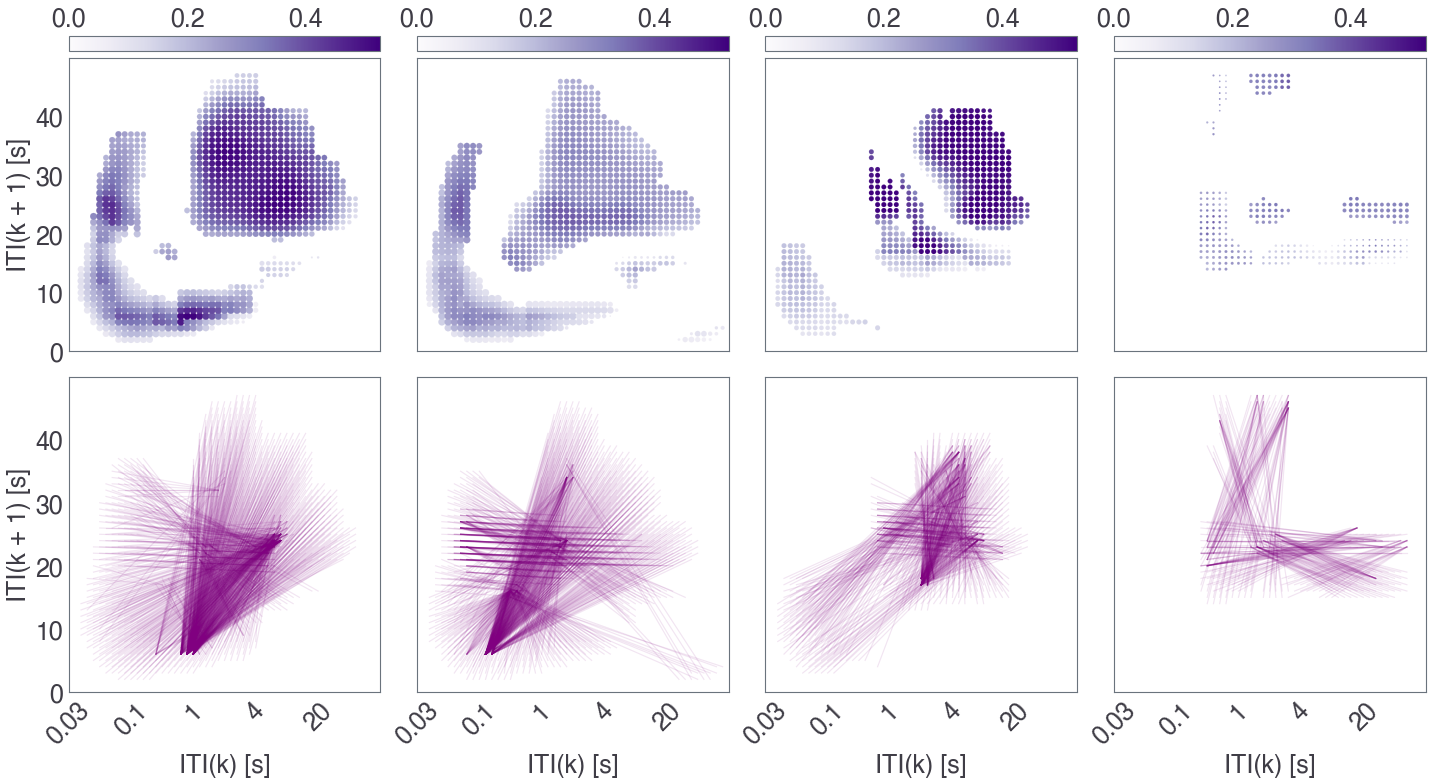

In [16]:
fig, ax = plt.subplots(2, 4, figsize=(20, 11), sharex=True, sharey=True)

X = np.arange(2500) % 50;
Y = np.arange(2500) // 50;
labels = ['0.03', '0.1', '1', '4', '20']
ticks = np.arange(50)[::10]

for kk in range(4):
    
    im = ax[0][kk].scatter(X, Y, s=n_flips[:, kk] / fmax * 50, c=compt_r2[:, kk], cmap='Purples', norm=Normalize(0, vmax=rmax))
    divider = make_axes_locatable(ax[0][kk])
    cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
    fig.add_axes(cax)
    cb = fig.colorbar(im, cax=cax, orientation="horizontal")
    cb.ax.xaxis.set_ticks_position('top')

    for i in range(2500):
        if best_r2[i, 5, kk] == 1:
            x1, y1, x2, y2 = best_r2[i, 1:5, kk]
            ax[1][kk].plot([x1, x2], [y1, y2], '-', color='purple', alpha=0.1)

    for i in range(2):
        ax[i][kk].grid(False)
        ax[i][kk].set_xticks(ticks)
        ax[i][kk].set_xticklabels(labels)
        ax[i][kk].xaxis.set_tick_params(rotation=45)
        ax[i][kk].set_yticks(ticks)
        ax[i][kk].set_xlim([0, 50])
        ax[i][kk].set_ylim([0, 50])
        if i == 1:
            ax[i][kk].set_xlabel('ITI(k) [s]')
        if kk == 0:
            ax[i][kk].set_ylabel('ITI(k + 1) [s]')
plt.tight_layout()
plt.savefig('figure_2_supplementary_ii.pdf', transparent=True)

# Panel a - example pixel residual on age - no flips

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5.5))

labels = ['0.03', '0.1', '1', '4', '20']
ticks = np.arange(50)[::10]

IDX = 0
val = all_age[IDX].flat[0][0].flat[0]
mdl = val[2]
A = val[3].squeeze()
B = val[4].squeeze()

r2_vals = np.zeros(2500)
betas = np.zeros((2500, 3))

for j, obj in enumerate(mdl):
    pixel = obj.flat[0][0][0]
    r2_vals[j] = pixel[0][0][0]
    betas[j] = pixel[3].squeeze()

residual = all_age[IDX].flat[0][1].flat[0][6]
betas_res = all_age[IDX].flat[0][1].flat[0][5]
p_vals_res = all_age[IDX].flat[0][1].flat[0][1]

im = ax[0].imshow(10 ** np.mean(A, 0).reshape(50, 50), aspect='auto', cmap='gray')
ax[0].invert_yaxis()
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)
ax[0].xaxis.set_tick_params(rotation=45)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].set_xlabel('ITI(k) [s]')
ax[0].set_ylabel('ITI(k + 1) [s]')
ax[0].grid(False)
divider = make_axes_locatable(ax[0])
cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
fig.add_axes(cax)
cb = fig.colorbar(im, cax=cax, orientation="horizontal")
cb.ax.xaxis.set_ticks_position('top')

# 28.        , 41.        , 38.        , 41.            
X1, Y1 = 28, 41
X2, Y2 = 38, 41

rect1 = patches.Rectangle((X1, Y1), 1, 1, linewidth=2, edgecolor='purple', facecolor='none')
rect2 = patches.Rectangle((X2, Y2), 1, 1, linewidth=2, edgecolor='orange', facecolor='none')
ax[0].add_patch(rect1)
ax[0].add_patch(rect2)

MM = B @ betas.T

for i, (_X, _Y, _color) in enumerate(zip([X1, X2], [Y1, Y2], ['purple', 'orange'])):

    idx1 = _Y * 50 + _X
    _y = A[:, idx1]
    _x = B[:, 0]
    print(betas[idx1])
    _k = betas[idx1]
    mm = MM[:, idx1]
    _min = np.argmin(_x)
    _max = np.argmax(_x)
    ax[i + 1].scatter(_x, _y, facecolors='none', edgecolors=_color)
    ax[i + 1].plot([_x[_min], _x[_max]], [mm[_min], mm[_max]], '--b')
#     ax[i + 1].plot([min(_x), max(_x)], np.array([min(_x), max(_x)]) * _k[0] + _k[2], '--b')
#     ax[i + 1].set_ylim([-5, 2])

# idx1 = X1 * 50 + Y1
# idx2 = X2 * 50 + Y2
idx1 = Y1 * 50 + X1
idx2 = Y2 * 50 + X2
print(betas_res[idx1, idx2])
print(p_vals_res[idx1, idx2])
print((r2_vals[idx1], r2_vals[idx2]))
ax[3].scatter(residual[:, idx1], residual[:, idx2], facecolors='none', edgecolors='k')
# ax[3].set_xlim([-2 , 2])
# ax[3].set_ylim([-2 , 2])

ax[1].set_xlabel("Age [years]")
ax[1].set_ylabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")
ax[2].set_xlabel("Age [years]")
ax[2].set_ylabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")

ax[3].set_xlabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")
ax[3].xaxis.label.set_color('purple')
ax[3].set_ylabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")
ax[3].yaxis.label.set_color('orange')

plt.tight_layout()
plt.savefig('figure_2_panel_a.pdf', transparent=True)

# Panel b - balls plot - no flips

In [4]:
min_dist_pix = 5;
th_dist = min_dist_pix * np.sqrt(2);
th_R2 = .1;

n_non_flips = np.zeros((2500, 4))
n_connections = np.zeros((2500, 4))
r2_with_no_flips = np.zeros((2500, 5))
n_no_flips = np.zeros(4)
n_connections = np.zeros((2500, 4))
compt_r2 = np.zeros((2500, 4))
max_idxs = np.zeros((2500, 4))
all_r2_locs = []
all_to_avg_r2 = []

# save all the flips
for kk in range(4):
    to_avg_r2 = [[] for _ in range(2500)]
    r2_locs = [[] for _ in range(2500)]
    # VALUES
    val = all_age[ORDER[kk]].flat[0][0].flat[0]
    masks = [m[0] for m in val[0]]
    mask_uni = masks[0]
    mask_full = masks[-1]
    mdl = val[2]
    f_full = np.zeros(2500)
    r2_full = np.zeros(2500)
    p_full = np.zeros(2500)
    f_uni = np.zeros((2500, 2))
    p_uni = np.zeros((2500, 2))
    betas = np.zeros((2500, 3))

    # mdl is 2500 long
    for j, obj in enumerate(mdl):
        pixel = obj.flat[0][0][0]
        r2_full[j] = pixel[0][0][0]
        f_full[j] = pixel[1][0][0]
        p_full[j] = pixel[2][0][0]
        betas[j] = pixel[3].squeeze()
        continuous = pixel[7][0][0]
        f_uni[j] = continuous[0]
        p_uni[j] = continuous[1]

    # RESIDUALS
    residual = all_age[ORDER[kk]].flat[0][1].flat[0]
    mask_res = residual[0]
    p_vals_res = residual[1]
    f_vals_res = residual[2] 
    r_vals_res = residual[3]
    r2_vals_res = residual[4]
    betas_res = residual[5]

    for i in range(2500):
        for j in range(2500):
            if i != j:
                if (r2_full[i] > th_R2) & (r2_full[j] > th_R2) & (mask_res[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
                    x1 = i % 50
                    y1 = i // 50
                    x2 = j % 50
                    y2 = j // 50
                    if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
                        _r2 = r2_vals_res[j, i]
                        to_avg_r2[j].append(_r2)
                        r2_locs[j].append(i)
                        r2_with_no_flips[i, 0] = r2_vals_res[j, i]
                        r2_with_no_flips[i, 1] = x1
                        r2_with_no_flips[i, 2] = y1
                        r2_with_no_flips[i, 3] = x2
                        r2_with_no_flips[i, 4] = y2
                        n_no_flips[kk] += 1
                        
    compt_r2[:, kk] = np.array([np.max(i) if len(i) > 0 else 0 for i in to_avg_r2])
    max_idxs[:, kk] = np.array([np.argmax(i) if len(i) > 0 else -1 for i in to_avg_r2])
    n_connections[:, kk] = np.array([len(i) for i in to_avg_r2])
    all_r2_locs.append(r2_locs[:])
    all_to_avg_r2.append(to_avg_r2[:])

rmax = np.percentile(compt_r2, 99)
smax = np.percentile(n_connections, 99)
print((rmax, smax))

(0.9649693642445647, 661.0100000000002)


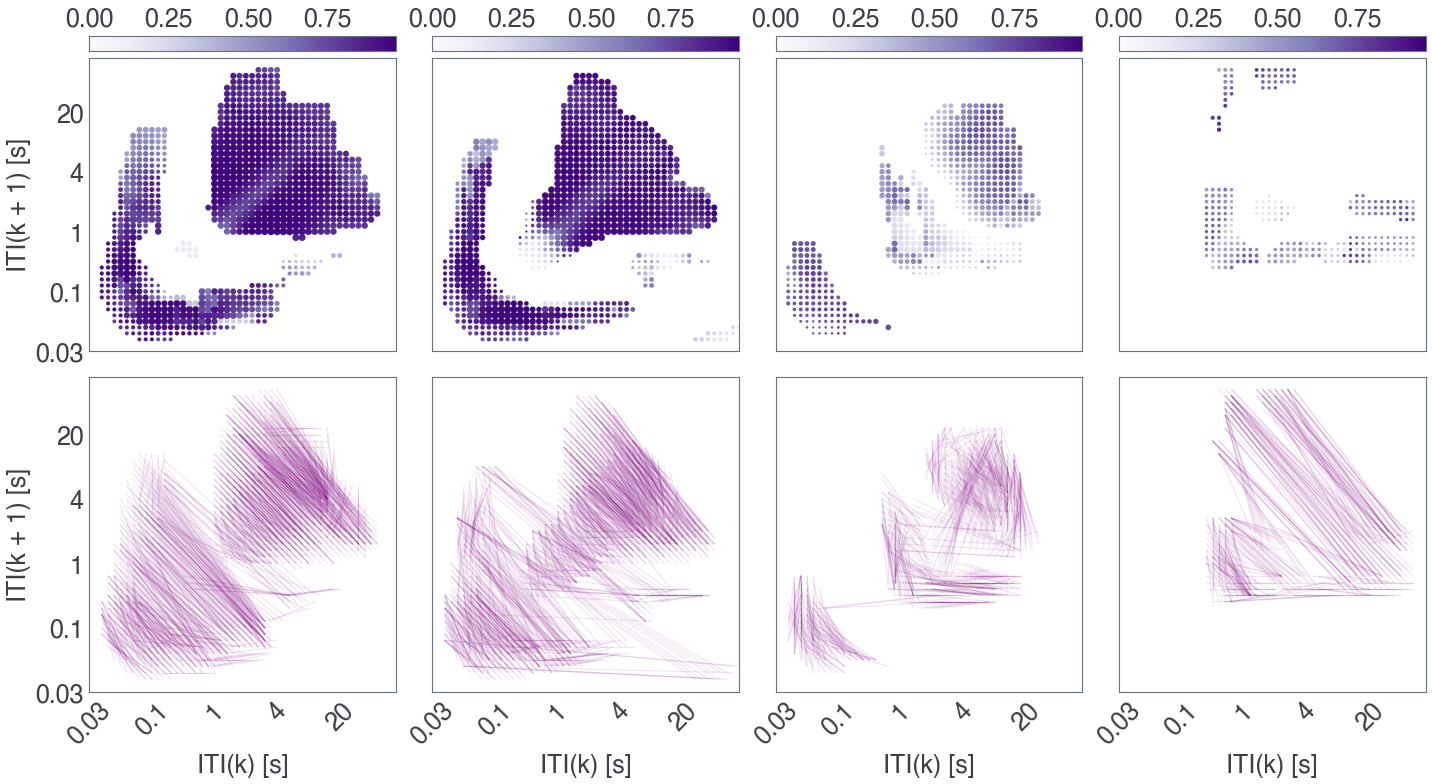

In [6]:
fig, ax = plt.subplots(2, 4, figsize=(20, 11), sharex=True, sharey=True)

labels = ['0.03', '0.1', '1', '4', '20']
ticks = np.arange(50)[::10]

X = np.arange(2500) % 50;
Y = np.arange(2500) // 50;

for kk in range(4):
    
    im = ax[0][kk].scatter(X, Y, s=n_connections[:, kk] / smax * 50, c=compt_r2[:, kk], 
                           cmap='Purples', norm=Normalize(0, vmax=rmax))
    
#     if kk == 0:
#         handles, lbls = im.legend_elements(prop="sizes", alpha=0.6, num=5)
#         lbls = np.int32((np.array([10, 20, 30, 40, 50]) / 50 * smax + 50) // 100 * 100)
#         legend2 = ax[0][kk].legend(handles, lbls, loc="upper right", title="Sizes", ncol=5)
    
    divider = make_axes_locatable(ax[0][kk])
    cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
    fig.add_axes(cax)
    cb = fig.colorbar(im, cax=cax, orientation="horizontal")
    cb.ax.xaxis.set_ticks_position('top')

    for i in range(2500):
        if len(all_r2_locs[kk][i]) > 0:
            k = all_r2_locs[kk][i][np.argmax(all_to_avg_r2[kk][i])]
            ax[1][kk].plot([X[i], X[k]], [Y[i], Y[k]], '-', color='purple', alpha=0.1)

    # legende the size
    for i in range(2):
        ax[i][kk].grid(False)
        ax[i][kk].set_xticks(ticks)
        ax[i][kk].set_xticklabels(labels)
        ax[i][kk].xaxis.set_tick_params(rotation=45)
        ax[i][kk].set_yticks(ticks)
        ax[i][kk].set_yticklabels(labels)
        ax[i][kk].set_xlim([0, 49])
        ax[i][kk].set_ylim([0, 49])

        if i == 1:
            ax[i][kk].set_xlabel('ITI(k) [s]')
        if kk == 0:
            ax[i][kk].set_ylabel('ITI(k + 1) [s]')
            
plt.tight_layout()
plt.savefig('figure_2_panel_b.pdf', transparent=True)

In [ ]:
# fig, ax = plt.subplots(2, 4, figsize=(20, 11), sharex=True, sharey=True)

# labels = ['0.03', '0.1', '1', '4', '20']
# ticks = np.arange(50)[::10]

# min_dist_pix = 5;
# th_dist = min_dist_pix * np.sqrt(2);
# th_R2 = .1;
# X = np.arange(2500) % 50;
# Y = np.arange(2500) // 50;
# n_non_flips = np.zeros((2500, 4))
# n_connections = np.zeros((2500, 4))
# r2_with_no_flips = np.zeros((2500, 5))
# n_no_flips = np.zeros(4)

# # save all the flips
# for kk in range(4):
#     to_avg_r2 = [[] for _ in range(2500)]
#     r2_locs = [[] for _ in range(2500)]
#     best_r2 = np.zeros((2500, 6))
#     # VALUES
#     val = all_age[ORDER[kk]].flat[0][0].flat[0]
#     masks = [m[0] for m in val[0]]
#     mask_uni = masks[0]
#     mask_full = masks[-1]
#     mdl = val[2]
#     f_full = np.zeros(2500)
#     r2_full = np.zeros(2500)
#     p_full = np.zeros(2500)
#     f_uni = np.zeros((2500, 2))
#     p_uni = np.zeros((2500, 2))
#     betas = np.zeros((2500, 3))

#     # mdl is 2500 long
#     for j, obj in enumerate(mdl):
#         pixel = obj.flat[0][0][0]
#         r2_full[j] = pixel[0][0][0]
#         f_full[j] = pixel[1][0][0]
#         p_full[j] = pixel[2][0][0]
#         betas[j] = pixel[3].squeeze()
#         continuous = pixel[7][0][0]
#         f_uni[j] = continuous[0]
#         p_uni[j] = continuous[1]

#     # RESIDUALS
#     residual = all_age[ORDER[kk]].flat[0][1].flat[0]
#     mask_res = residual[0]
#     p_vals_res = residual[1]
#     f_vals_res = residual[2] 
#     r_vals_res = residual[3]
#     r2_vals_res = residual[4]
#     betas_res = residual[5]

#     for i in range(2500):
#         for j in range(2500):
#             if i != j:
#                 if (r2_full[i] > th_R2) & (r2_full[j] > th_R2) & (mask_res[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
#                     x1 = i % 50
#                     y1 = i // 50
#                     x2 = j % 50
#                     y2 = j // 50
#                     if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
# #                         if ((np.sign(betas[i, 0]) == np.sign(betas[j, 0])) & (betas_res[i, j, 0] < 0)) | ((np.sign(betas[i, 0]) != np.sign(betas[j, 0])) & (betas_res[i, j, 0] > 0)):
# #                             n_flips += 1
# #                             r2_with_flips[i, 0] = r2_vals_res[j, i]
# #                             r2_with_flips[i, 1] = x1
# #                             r2_with_flips[i, 2] = y1
# #                             r2_with_flips[i, 3] = x2
# #                             r2_with_flips[i, 4] = y2
# #                         else:
#                         _r2 = r2_vals_res[j, i]
#                         to_avg_r2[j].append(_r2)
#                         r2_locs[j].append(i)
#                         r2_with_no_flips[i, 0] = r2_vals_res[j, i]
#                         r2_with_no_flips[i, 1] = x1
#                         r2_with_no_flips[i, 2] = y1
#                         r2_with_no_flips[i, 3] = x2
#                         r2_with_no_flips[i, 4] = y2
#                         n_no_flips[kk] += 1
                        
#     compt_r2 = np.array([np.max(i) if len(i) > 0 else 0 for i in to_avg_r2])
#     n_connections = np.array([len(i) for i in to_avg_r2])
    
#     im = ax[0][kk].scatter(X, Y, s=n_connections / np.max(n_connections) * 50, c=compt_r2, cmap='Purples')
#     divider = make_axes_locatable(ax[0][kk])
#     cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
#     fig.add_axes(cax)
#     cb = fig.colorbar(im, cax=cax, orientation="horizontal")
#     cb.ax.xaxis.set_ticks_position('top')

#     for i in range(2500):
#         if len(r2_locs[i]) > 0:
#             k = r2_locs[i][np.argmax(to_avg_r2[i])]
#             ax[1][kk].plot([X[i], X[k]], [Y[i], Y[k]], '-', color='purple', alpha=0.1)

# # legende the size
#     for i in range(2):
#         ax[i][kk].grid(False)
#         ax[i][kk].set_xticks(ticks)
#         ax[i][kk].set_xticklabels(labels)
#         ax[i][kk].xaxis.set_tick_params(rotation=45)
#         ax[i][kk].set_yticks(ticks)
#         ax[i][kk].set_yticklabels(labels)
#         ax[i][kk].set_xlim([0, 49])
#         ax[i][kk].set_ylim([0, 49])

#         if i == 1:
#             ax[i][kk].set_xlabel('ITI(k) [s]')
#         if kk == 0:
#             ax[i][kk].set_ylabel('ITI(k + 1) [s]')

# plt.tight_layout()
# plt.savefig('figure_2_panel_b_v1.pdf', transparent=True)

In [ ]:
# print(r2_with_no_flips[np.argmax(r2_with_no_flips[:, 0])])
# print(n_no_flips)

# Panel c - example pixel residual on age - flips

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5.5))

labels = ['0.03', '0.1', '1', '4', '20']
ticks = np.arange(50)[::10]

IDX = 0
val = all_age[IDX].flat[0][0].flat[0]
mdl = val[2]
A = val[3].squeeze()
B = val[4].squeeze()

r2_vals = np.zeros(2500)
betas = np.zeros((2500, 3))

for j, obj in enumerate(mdl):
    pixel = obj.flat[0][0][0]
    r2_vals[j] = pixel[0][0][0]
    betas[j] = pixel[3].squeeze()

residual = all_age[IDX].flat[0][1].flat[0][6]
betas_res = all_age[IDX].flat[0][1].flat[0][5]
p_vals_res = all_age[IDX].flat[0][1].flat[0][1]

im = ax[0].imshow(10 ** np.mean(A, 0).reshape(50, 50), aspect='auto', cmap='gray')
ax[0].invert_yaxis()
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)
ax[0].xaxis.set_tick_params(rotation=45)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].set_xlabel('ITI(k) [s]')
ax[0].set_ylabel('ITI(k + 1) [s]')
ax[0].grid(False)
divider = make_axes_locatable(ax[0])
cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
fig.add_axes(cax)
cb = fig.colorbar(im, cax=cax, orientation="horizontal")
cb.ax.xaxis.set_ticks_position('top')

# 21.         41.         40.         16.           
X1, Y1 = 21, 41
X2, Y2 = 40, 16

rect1 = patches.Rectangle((X1, Y1), 1, 1, linewidth=2, edgecolor='purple', facecolor='none')
rect2 = patches.Rectangle((X2, Y2), 1, 1, linewidth=2, edgecolor='orange', facecolor='none')
ax[0].add_patch(rect1)
ax[0].add_patch(rect2)

MM = B @ betas.T

for i, (_X, _Y, _color) in enumerate(zip([X1, X2], [Y1, Y2], ['purple', 'orange'])):

    idx1 = _Y * 50 + _X
    _y = A[:, idx1]
    _x = B[:, 0]
    print(betas[idx1])
    _k = betas[idx1]
    mm = MM[:, idx1]
    _min = np.argmin(_x)
    _max = np.argmax(_x)
    ax[i + 1].scatter(_x, _y, facecolors='none', edgecolors=_color)
    ax[i + 1].plot([_x[_min], _x[_max]], [mm[_min], mm[_max]], '--b')
#     ax[i + 1].plot([min(_x), max(_x)], np.array([min(_x), max(_x)]) * _k[0] + _k[2], '--b')
#     ax[i + 1].set_ylim([-5, 2])

# idx1 = X1 * 50 + Y1
# idx2 = X2 * 50 + Y2
idx1 = Y1 * 50 + X1
idx2 = Y2 * 50 + X2
print(betas_res[idx1, idx2])
print(p_vals_res[idx1, idx2])
print((r2_vals[idx1], r2_vals[idx2]))
ax[3].scatter(residual[:, idx1], residual[:, idx2], facecolors='none', edgecolors='k')
# ax[3].set_xlim([-2 , 2])
# ax[3].set_ylim([-2 , 2])

ax[1].set_xlabel("Age [years]")
ax[1].set_ylabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")
ax[2].set_xlabel("Age [years]")
ax[2].set_ylabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")

ax[3].set_xlabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")
ax[3].xaxis.label.set_color('purple')
ax[3].set_ylabel("Smartphone behaviour \n Joint interval bin [Log10(PD)]")
ax[3].yaxis.label.set_color('orange')

plt.tight_layout()
plt.savefig('figure_2_panel_c.pdf', transparent=True)

# Panel d - balls plot - flips

In [22]:
min_dist_pix = 5;
th_dist = min_dist_pix * np.sqrt(2);
th_R2 = .1;
n_connections = np.zeros((2500, 4))
r2_with_flips = np.zeros((2500, 5, 4))
n_flips = np.zeros(4)
compt_r2 = np.zeros((2500, 4))
max_idxs = np.zeros((2500, 4))
all_r2_locs = []
all_to_avg_r2 = []

# save all the flips
for kk in range(4):
    to_avg_r2 = [[] for _ in range(2500)]
    r2_locs = [[] for _ in range(2500)]
    # VALUES
    val = all_age[ORDER[kk]].flat[0][0].flat[0]
    masks = [m[0] for m in val[0]]
    mask_uni = masks[0]
    mask_full = masks[-1]
    mdl = val[2]
    f_full = np.zeros(2500)
    r2_full = np.zeros(2500)
    p_full = np.zeros(2500)
    f_uni = np.zeros((2500, 2))
    p_uni = np.zeros((2500, 2))
    betas = np.zeros((2500, 3))

    # mdl is 2500 long
    for j, obj in enumerate(mdl):
        pixel = obj.flat[0][0][0]
        r2_full[j] = pixel[0][0][0]
        f_full[j] = pixel[1][0][0]
        p_full[j] = pixel[2][0][0]
        betas[j] = pixel[3].squeeze()
        continuous = pixel[7][0][0]
        f_uni[j] = continuous[0]
        p_uni[j] = continuous[1]

    # RESIDUALS
    residual = all_age[ORDER[kk]].flat[0][1].flat[0]
    mask_res = residual[0]
    p_vals_res = residual[1]
    f_vals_res = residual[2] 
    r_vals_res = residual[3]
    r2_vals_res = residual[4]
    betas_res = residual[5]

    for i in range(2500):
        for j in range(2500):
            if i != j:
                if (r2_full[i] > th_R2) & (r2_full[j] > th_R2) & (mask_res[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
                    x1 = i % 50
                    y1 = i // 50
                    x2 = j % 50
                    y2 = j // 50
                    if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
                        if ((np.sign(betas[i, 0]) == np.sign(betas[j, 0])) & (betas_res[i, j, 0] < 0)) | ((np.sign(betas[i, 0]) != np.sign(betas[j, 0])) & (betas_res[i, j, 0] > 0)):
                            _r2 = r2_vals_res[j, i]
                            to_avg_r2[j].append(_r2)
                            r2_locs[j].append(i)
                            r2_with_flips[i, 0, kk] = r2_vals_res[j, i]
                            r2_with_flips[i, 1, kk] = x1
                            r2_with_flips[i, 2, kk] = y1
                            r2_with_flips[i, 3, kk] = x2
                            r2_with_flips[i, 4, kk] = y2
                            n_flips[kk] += 1
                        
    compt_r2[:, kk] = np.array([np.max(i) if len(i) > 0 else 0 for i in to_avg_r2])
    max_idxs[:, kk] = np.array([np.argmax(i) if len(i) > 0 else -1 for i in to_avg_r2])
    n_connections[:, kk] = np.array([len(i) for i in to_avg_r2])
    all_r2_locs.append(r2_locs[:])
    all_to_avg_r2.append(to_avg_r2[:])

rmax = np.percentile(compt_r2, 99.99)
smax = np.percentile(n_connections, 99.99)
print((rmax, smax))

(0.4361353355086012, 285.0015999999887)


In [23]:
np.max(n_connections)

301.0

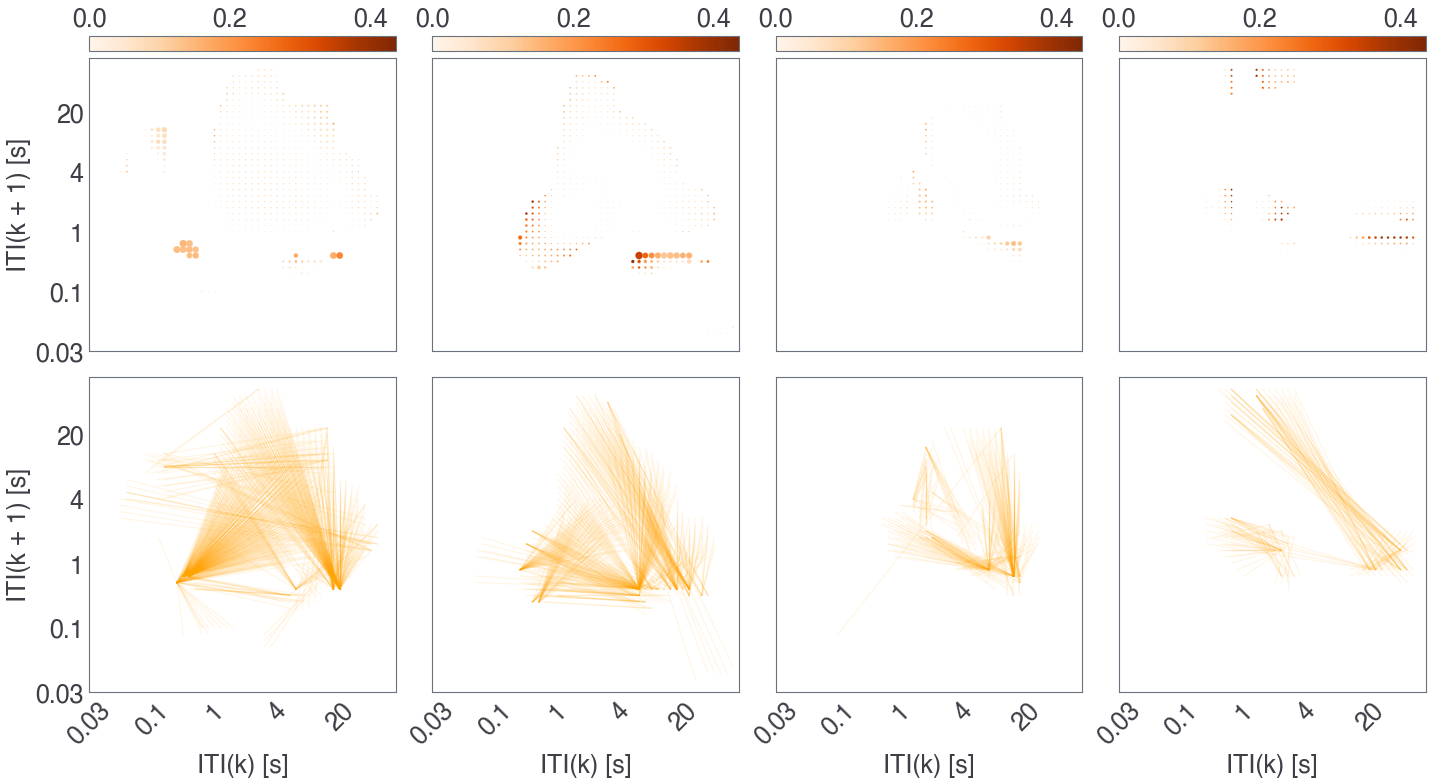

In [24]:
fig, ax = plt.subplots(2, 4, figsize=(20, 11), sharex=True, sharey=True)

labels = ['0.03', '0.1', '1', '4', '20']
ticks = np.arange(50)[::10]

for kk in range(4):

    im = ax[0][kk].scatter(X, Y, s=n_connections[:, kk] / smax * 50, c=compt_r2[:, kk], cmap='Oranges', norm=Normalize(0, vmax=rmax))
    divider = make_axes_locatable(ax[0][kk])
    cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
    fig.add_axes(cax)
    cb = fig.colorbar(im, cax=cax, orientation="horizontal")
    cb.ax.xaxis.set_ticks_position('top')

    for i in range(2500):
        if len(all_r2_locs[kk][i]) > 0:
            k = all_r2_locs[kk][i][np.argmax(all_to_avg_r2[kk][i])]
            ax[1][kk].plot([X[i], X[k]], [Y[i], Y[k]], '-', color='orange', alpha=0.1)

# legende the size
    for i in range(2):
        ax[i][kk].grid(False)
        ax[i][kk].set_xticks(ticks)
        ax[i][kk].set_xticklabels(labels)
        ax[i][kk].xaxis.set_tick_params(rotation=45)
        ax[i][kk].set_yticks(ticks)
        ax[i][kk].set_yticklabels(labels)
        ax[i][kk].set_xlim([0, 49])
        ax[i][kk].set_ylim([0, 49])

        if i == 1:
            ax[i][kk].set_xlabel('ITI(k) [s]')
        if kk == 0:
            ax[i][kk].set_ylabel('ITI(k + 1) [s]')

plt.tight_layout()
plt.savefig('figure_2_panel_d.pdf', transparent=True)

In [ ]:
# fig, ax = plt.subplots(2, 4, figsize=(20, 11), sharex=True, sharey=True)

# labels = ['0.03', '0.1', '1', '4', '20']
# ticks = np.arange(50)[::10]

# min_dist_pix = 5;
# th_dist = min_dist_pix * np.sqrt(2);
# th_R2 = .1;
# X = np.arange(2500) % 50;
# Y = np.arange(2500) // 50;
# r2_with_flips = np.zeros((2500, 5, 4))
# n_flips = np.zeros(4)

# # save all the flips
# for kk in range(4):
#     to_avg_r2 = [[] for _ in range(2500)]
#     r2_locs = [[] for _ in range(2500)]
#     best_r2 = np.zeros((2500, 6))
#     # VALUES
#     val = all_age[ORDER[kk]].flat[0][0].flat[0]
#     masks = [m[0] for m in val[0]]
#     mask_uni = masks[0]
#     mask_full = masks[-1]
#     mdl = val[2]
#     f_full = np.zeros(2500)
#     r2_full = np.zeros(2500)
#     p_full = np.zeros(2500)
#     f_uni = np.zeros((2500, 2))
#     p_uni = np.zeros((2500, 2))
#     betas = np.zeros((2500, 3))

#     # mdl is 2500 long
#     for j, obj in enumerate(mdl):
#         pixel = obj.flat[0][0][0]
#         r2_full[j] = pixel[0][0][0]
#         f_full[j] = pixel[1][0][0]
#         p_full[j] = pixel[2][0][0]
#         betas[j] = pixel[3].squeeze()
#         continuous = pixel[7][0][0]
#         f_uni[j] = continuous[0]
#         p_uni[j] = continuous[1]

#     # RESIDUALS
#     residual = all_age[ORDER[kk]].flat[0][1].flat[0]
#     mask_res = residual[0]
#     p_vals_res = residual[1]
#     f_vals_res = residual[2] 
#     r_vals_res = residual[3]
#     r2_vals_res = residual[4]
#     betas_res = residual[5]

#     for i in range(2500):
#         for j in range(2500):
#             if i != j:
#                 if (r2_full[i] > th_R2) & (r2_full[j] > th_R2) & (mask_res[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
#                     x1 = i % 50
#                     y1 = i // 50
#                     x2 = j % 50
#                     y2 = j // 50
#                     if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
#                         if ((np.sign(betas[i, 0]) == np.sign(betas[j, 0])) & (betas_res[i, j, 0] < 0)) | ((np.sign(betas[i, 0]) != np.sign(betas[j, 0])) & (betas_res[i, j, 0] > 0)):
#                             n_flips[kk] += 1
#                             r2_with_flips[i, 0, kk] = r2_vals_res[j, i]
#                             r2_with_flips[i, 1, kk] = x1
#                             r2_with_flips[i, 2, kk] = y1
#                             r2_with_flips[i, 3, kk] = x2
#                             r2_with_flips[i, 4, kk] = y2
#                             _r2 = r2_vals_res[j, i]
#                             to_avg_r2[j].append(_r2)
#                             r2_locs[j].append(i)
                        
#     compt_r2 = np.array([np.max(i) if len(i) > 0 else 0 for i in to_avg_r2])
#     n_connections = np.array([len(i) for i in to_avg_r2])
    
#     im = ax[0][kk].scatter(X, Y, s=n_connections / np.max(n_connections) * 50, c=compt_r2, cmap='Oranges', norm=TwoSlopeNorm(0, vmax=0.4))
#     divider = make_axes_locatable(ax[0][kk])
#     cax = divider.new_vertical(size="5%", pad=.1, pack_start=False)
#     fig.add_axes(cax)
#     cb = fig.colorbar(im, cax=cax, orientation="horizontal")
#     cb.ax.xaxis.set_ticks_position('top')

#     for i in range(2500):
#         if len(r2_locs[i]) > 0:
#             k = r2_locs[i][np.argmax(to_avg_r2[i])]
#             ax[1][kk].plot([X[i], X[k]], [Y[i], Y[k]], '-', color='orange', alpha=0.1)

# # legende the size
#     for i in range(2):
#         ax[i][kk].grid(False)
#         ax[i][kk].set_xticks(ticks)
#         ax[i][kk].set_xticklabels(labels)
#         ax[i][kk].xaxis.set_tick_params(rotation=45)
#         ax[i][kk].set_yticks(ticks)
#         ax[i][kk].set_yticklabels(labels)
#         ax[i][kk].set_xlim([0, 49])
#         ax[i][kk].set_ylim([0, 49])

#         if i == 1:
#             ax[i][kk].set_xlabel('ITI(k) [s]')
#         if kk == 0:
#             ax[i][kk].set_ylabel('ITI(k + 1) [s]')

# plt.tight_layout()
# plt.savefig('figure_2_panel_d.pdf', transparent=True)

In [ ]:
# print(r2_with_flips[np.argmax(r2_with_flips[:, 0, 0]), :, 0])
# print(n_flips)

# Alternative 1
Number of incoming connections with sign flip.
Gain/Loss in this pixel is consistently associated, across the population, with loss/gain in other pixels.
Consistently gaining or losing following age.

In [ ]:
# fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# labels = ['0.03', '0.1', '1', '4', '20']
# ticks = np.arange(50)[::10]

min_dist_pix = 10;
th_dist = min_dist_pix * np.sqrt(2);
th_R = .5;
th_F = 5;

X = np.arange(2500) % 50;
Y = np.arange(2500) // 50;
n_con_pos_b = np.zeros((2500,))
n_con_neg_b = np.zeros((2500,))

to_avg_r2_pos_b = [[] for _ in range(2500)]
to_avg_r2_neg_b = [[] for _ in range(2500)]

best_r2_pos_b = np.zeros((2500, 6))
best_r2_neg_b = np.zeros((2500, 6))

for kk in range(1):
    # VALUES
    val = all_age_gender[ORDER[kk]].flat[0][5].flat[0]
    masks = [m[0] for m in val[0]]
    mask_uni = masks[0]
    mask_full = masks[-1]
    mdl = val[2]
    f_full = np.zeros(2500)
    r2_full = np.zeros(2500)
    p_full = np.zeros(2500)
    f_uni = np.zeros((2500, 2))
    p_uni = np.zeros((2500, 2))
    betas = np.zeros((2500, 3))

    # mdl is 2500 long
    for j, obj in enumerate(mdl):
        pixel = obj.flat[0][0][0]
        r2_full[j] = pixel[3][0][0]
        f_full[j] = pixel[4][0][0]
        p_full[j] = pixel[6][0][0]
        betas[j] = pixel[1].squeeze()
        continuous = pixel[7][0][0]
        f_uni[j] = continuous[0]
        p_uni[j] = continuous[2]

    # RESIDUALS
    residual = all_age_gender[ORDER[kk]].flat[0][6].flat[0]
    mask_res = residual[0]
    p_vals_res = residual[1]
    f_vals_res = residual[2] 
    r_vals_res = residual[3]
    r2_vals_res = residual[4]
    betas_res = residual[5]

    for i in range(2500):
        for j in range(i + 1, 2500):
            if (abs(r_vals_res[i, j]) > th_R) & (f_vals_res[i, j] > th_F) & (mask[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
                x1 = i % 50
                y1 = i // 50
                x2 = j % 50
                y2 = j // 50
#                 if (x1 % 2 == 0) & (y1 % 2 == 0) & (x2 % 2 == 0) & (y2 % 2 == 0):
                if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
                    if np.sign(betas[i, 0]) != np.sign(betas[j, 0]):
                        _r2 = r2_vals_res[i, j]
                        if betas[i, 0] > 0:
                            n_con_pos_b[i] += 1
                            to_avg_r2_pos_b[i].append(_r2)
                            if _r2 > best_r2_pos_b[i, 0]:
                                best_r2_pos_b[i, 0] = _r2
                                best_r2_pos_b[i, 1] = x1
                                best_r2_pos_b[i, 2] = y1
                                best_r2_pos_b[i, 3] = x2
                                best_r2_pos_b[i, 4] = y2
                                best_r2_pos_b[i, 5] = 1
                        else:
                            n_con_neg_b[i] += 1
                            to_avg_r2_neg_b[i].append(_r2)
                            if _r2 > best_r2_neg_b[i, 0]:
                                best_r2_neg_b[i, 0] = _r2
                                best_r2_neg_b[i, 1] = x1
                                best_r2_neg_b[i, 2] = y1
                                best_r2_neg_b[i, 3] = x2
                                best_r2_neg_b[i, 4] = y2
                                best_r2_neg_b[i, 5] = 1

avg_r2_pos_b = np.array([np.mean(i) for i in to_avg_r2_pos_b])
avg_r2_neg_b = np.array([np.mean(i) for i in to_avg_r2_neg_b])

In [ ]:
labels = ['0.03', '0.1', '1', '4', '20']
ticks = np.arange(50)[::10]

fig, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].scatter(X, Y, s=n_con_pos_b / np.max(n_con_pos_b) * 50, c=avg_r2_pos_b, cmap='Reds')
ax[0].scatter(X, Y, s=n_con_neg_b / np.max(n_con_neg_b) * 50, c=avg_r2_neg_b, cmap='Blues')
ax[0].set_title("1")
for i in range(2500):
    if best_r2_pos_b[i, 5] == 1:
        x1, y1, x2, y2 = best_r2_pos_b[i, 1:5]
        ax[1].plot([x1, x2], [y1, y2], 'r-', alpha=0.1)
    if best_r2_neg_b[i, 5] == 1:
        x1, y1, x2, y2 = best_r2_neg_b[i, 1:5]
        ax[2].plot([x1, x2], [y1, y2], 'b-', alpha=0.1)
ax[1].set_title("2")
ax[2].set_title("3")
for i in range(3):
    ax[i].grid(False)
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(labels)
    ax[i].xaxis.set_tick_params(rotation=45)
    ax[i].set_yticks(ticks)
    ax[i].set_yticklabels(labels)
    ax[i].set_xlabel('ITI(k) [s]')
    ax[i].set_ylabel('ITI(k + 1) [s]')
    ax[i].set_xlim([0, 50])
    ax[i].set_ylim([0, 50])
    
plt.tight_layout()
# ax[1].grid(False)
# ax[2].grid(False)

# Alternative - 2
R2 of the furthest pixel

In [ ]:
# fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# labels = ['0.03', '0.1', '1', '4', '20']
# ticks = np.arange(50)[::10]

min_dist_pix = 10;
th_dist = min_dist_pix * np.sqrt(2);
th_R = .5;
th_F = 1;

X = np.arange(2500) % 50;
Y = np.arange(2500) // 50;

furthest_r2_pos = np.zeros((2500, 7))
furthest_r2_neg = np.zeros((2500, 7))

for kk in range(1):
    # VALUES
    val = all_age_gender[ORDER[kk]].flat[0][5].flat[0]
    masks = [m[0] for m in val[0]]
    mask_uni = masks[0]
    mask_full = masks[-1]
    mdl = val[2]
    f_full = np.zeros(2500)
    r2_full = np.zeros(2500)
    p_full = np.zeros(2500)
    f_uni = np.zeros((2500, 2))
    p_uni = np.zeros((2500, 2))
    betas = np.zeros((2500, 3))

    # mdl is 2500 long
    for j, obj in enumerate(mdl):
        pixel = obj.flat[0][0][0]
        r2_full[j] = pixel[3][0][0]
        f_full[j] = pixel[4][0][0]
        p_full[j] = pixel[6][0][0]
        betas[j] = pixel[1].squeeze()
        continuous = pixel[7][0][0]
        f_uni[j] = continuous[0]
        p_uni[j] = continuous[2]

    # RESIDUALS
    residual = all_age_gender[ORDER[kk]].flat[0][6].flat[0]
    mask_res = residual[0]
    p_vals_res = residual[1]
    f_vals_res = residual[2] 
    r_vals_res = residual[3]
    r2_vals_res = residual[4]
    betas_res = residual[5]

    for i in range(2500):
        for j in range(i + 1, 2500):
            if (abs(r_vals_res[i, j]) > th_R) & (f_vals_res[i, j] > th_F) & (mask[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
                x1 = i % 50
                y1 = i // 50
                x2 = j % 50
                y2 = j // 50
                dist = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                if dist > th_dist:
                    if np.sign(betas[i, 0]) != np.sign(betas[j, 0]):
                        _r2 = r2_vals_res[i, j]
                        
                        if betas[i, 0] > 0:
                            if dist > furthest_r2_pos[i, 0]:
                                furthest_r2_pos[i, 0] = dist
                                furthest_r2_pos[i, 1] = x1
                                furthest_r2_pos[i, 2] = y1
                                furthest_r2_pos[i, 3] = x2
                                furthest_r2_pos[i, 4] = y2
                                furthest_r2_pos[i, 5] = _r2
                                furthest_r2_pos[i, 6] = 1
                        else:
                            if dist > furthest_r2_neg[i, 0]:
                                furthest_r2_neg[i, 0] = dist
                                furthest_r2_neg[i, 1] = x1
                                furthest_r2_neg[i, 2] = y1
                                furthest_r2_neg[i, 3] = x2
                                furthest_r2_neg[i, 4] = y2
                                furthest_r2_neg[i, 5] = _r2
                                furthest_r2_neg[i, 6] = 1

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

im1 = ax[0].scatter(X, Y, s=furthest_r2_pos[:, 0] / np.max(furthest_r2_pos[:, 0]) * 50, c=furthest_r2_pos[:, 5], cmap='Reds')
im2 = ax[0].scatter(X, Y, s=furthest_r2_neg[:, 0] / np.max(furthest_r2_neg[:, 0]) * 50, c=furthest_r2_neg[:, 5], cmap='Blues')
# plt.colorbar(im1, ax=ax[0])
# plt.colorbar(im2, ax=ax[0])
ax[0].grid(False)

for i in range(2500):
    if furthest_r2_pos[i, 6] == 1:
        x1, y1, x2, y2 = furthest_r2_pos[i, 1:5]
        ax[1].plot([x1, x2], [y1, y2], 'r-', alpha=0.1)
    if furthest_r2_neg[i, 6] == 1:
        x1, y1, x2, y2 = furthest_r2_neg[i, 1:5]
        ax[2].plot([x1, x2], [y1, y2], 'b-', alpha=0.1)
ax[1].grid(False)
ax[2].grid(False)
for i in range(3):
    ax[i].grid(False)
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(labels)
    ax[i].xaxis.set_tick_params(rotation=45)
    ax[i].set_yticks(ticks)
    ax[i].set_yticklabels(labels)
    ax[i].set_xlabel('ITI(k) [s]')
    ax[i].set_ylabel('ITI(k + 1) [s]')
    ax[i].set_xlim([0, 50])
    ax[i].set_ylim([0, 50])
    
plt.tight_layout()

# Divide betas >< 0

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

labels = ['0.03', '0.1', '1', '4', '20']
ticks = np.arange(50)[::10]

min_dist_pix = 5;
th_dist = min_dist_pix * np.sqrt(2);
th_R = 0.8;
th_F = 5;

for kk in range(4):
    # VALUES
    val = all_age_gender[ORDER[kk]].flat[0][5].flat[0]
    masks = [m[0] for m in val[0]]
    mask_uni = masks[0]
    mask_full = masks[-1]
    mdl = val[2]
    f_full = np.zeros(2500)
    r2_full = np.zeros(2500)
    p_full = np.zeros(2500)
    f_uni = np.zeros((2500, 2))
    p_uni = np.zeros((2500, 2))
    betas = np.zeros((2500, 3))

    # mdl is 2500 long
    for j, obj in enumerate(mdl):
        pixel = obj.flat[0][0][0]
        r2_full[j] = pixel[3][0][0]
        f_full[j] = pixel[4][0][0]
        p_full[j] = pixel[6][0][0]
        betas[j] = pixel[1].squeeze()
        continuous = pixel[7][0][0]
        f_uni[j] = continuous[0]
        p_uni[j] = continuous[2]
        
    # RESIDUALS
    residual = all_age_gender[ORDER[kk]].flat[0][6].flat[0]
    mask_res = residual[0]
    p_vals_res = residual[1]
    f_vals_res = residual[2] 
    r_vals_res = residual[3]
    r2_vals_res = residual[4]
    betas_res = residual[5]
    
    for i in range(2500):
        for j in range(i + 1, 2500):
            if (abs(r_vals_res[i, j]) > th_R) & (f_vals_res[i, j] > th_F) & (mask[i, j] == 1) & ((mask_uni[i]) | (mask_uni[j])):
                x1 = i % 50
                y1 = i // 50
                x2 = j % 50
                y2 = j // 50
                if np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > th_dist:
                    if betas[i, 0] > 0:
                        if np.sign(betas[i, 0]) != np.sign(betas[j, 0]):
                            ax[0][kk].plot([x1, x2], [y1, y2], '-b', alpha=0.1, linewidth=1)
                        else:
                            ax[0][kk].plot([x1, x2], [y1, y2], '-r', alpha=0.1, linewidth=1)
                    else:
                        if np.sign(betas[i, 0]) != np.sign(betas[j, 0]):
                            ax[1][kk].plot([x1, x2], [y1, y2], '-', color='yellow', alpha=0.1, linewidth=1)
                        else:
                            ax[1][kk].plot([x1, x2], [y1, y2], '-', color='purple', alpha=0.1, linewidth=1)
    ax[0][kk].set_xlim([0, 49]);
    ax[0][kk].set_ylim([0, 49]);
    ax[1][kk].set_xlim([0, 49]);
    ax[1][kk].set_ylim([0, 49]);
    
plt.tight_layout()